In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/sample_tips_data.csv")
print(data.head())


# Check for missing values
print(data.isnull().sum())  # Checking for missing values


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


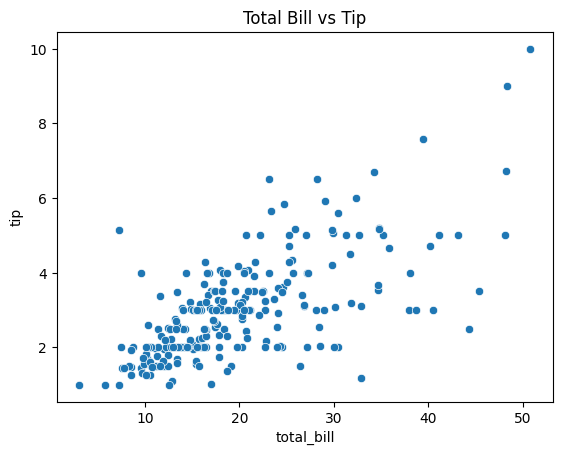

In [ ]:
# Scatter plot of total bill vs tip
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Total Bill vs Tip')
plt.show()


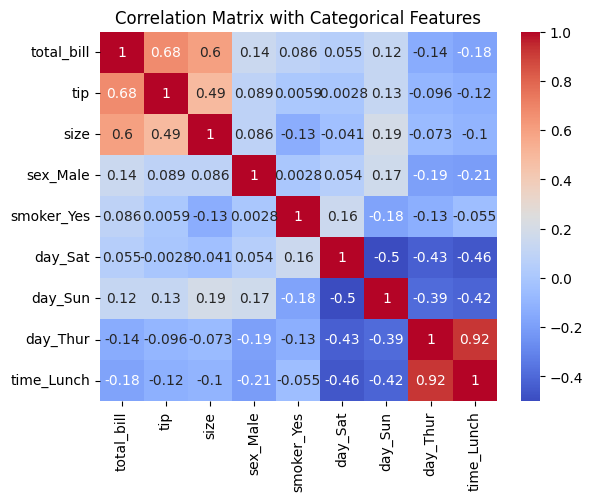

In [ ]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Compute the correlation matrix for the encoded data
corr_matrix = data_encoded.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Categorical Features')
plt.show()


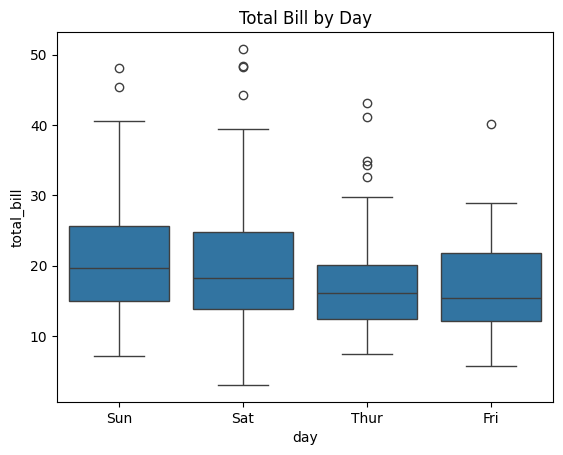

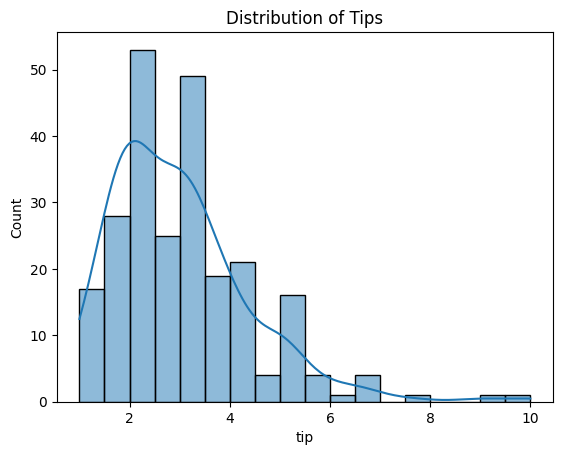

In [ ]:
# Box plot for total bill by day
sns.boxplot(x='day', y='total_bill', data=data)
plt.title('Total Bill by Day')
plt.show()

# Histogram for tip distribution
sns.histplot(data['tip'], kde=True)
plt.title('Distribution of Tips')
plt.show()


In [ ]:
# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Check the first few rows after one-hot encoding
print(data.head())


   total_bill   tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0       16.99  1.01     2     False       False    False     True     False   
1       10.34  1.66     3      True       False    False     True     False   
2       21.01  3.50     3      True       False    False     True     False   
3       23.68  3.31     2      True       False    False     True     False   
4       24.59  3.61     4     False       False    False     True     False   

   time_Lunch  
0       False  
1       False  
2       False  
3       False  
4       False  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
data[['total_bill', 'tip', 'size']] = scaler.fit_transform(data[['total_bill', 'tip', 'size']])

# Inspect the scaled data
print(data.head())


   total_bill       tip      size  sex_Male  smoker_Yes  day_Sat  day_Sun  \
0   -0.314711 -1.439947 -0.600193     False       False    False     True   
1   -1.063235 -0.969205  0.453383      True       False    False     True   
2    0.137780  0.363356  0.453383      True       False    False     True   
3    0.438315  0.225754 -0.600193      True       False    False     True   
4    0.540745  0.443020  1.506958     False       False    False     True   

   day_Thur  time_Lunch  
0     False       False  
1     False       False  
2     False       False  
3     False       False  
4     False       False  


In [ ]:
#splitting data
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = data.drop('tip', axis=1)  # Features excluding 'tip'
y = data['tip']  # Target variable (tip)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')


MSE: 0.47891187670474084, RMSE: 0.6920345921301484, MAE: 0.5261265782836895, R2: 0.45446441321494613


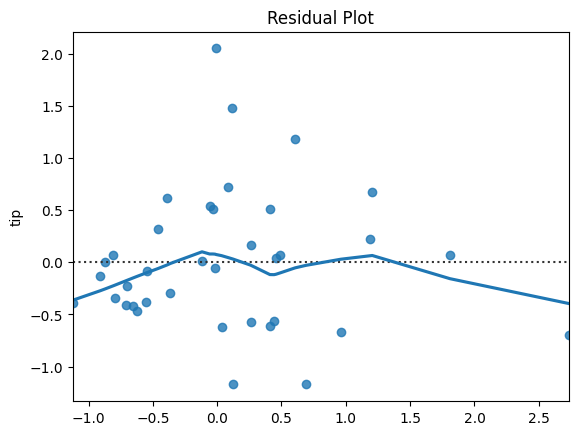

In [ ]:
#Evaluate the Base Model
# Residual plot to check for patterns in errors
sns.residplot(x=y_pred, y=y_val - y_pred, lowess=True)
plt.title('Residual Plot')
plt.show()


In [ ]:
#Evaluation Metrics
# Print evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')


MSE: 0.47891187670474084
RMSE: 0.6920345921301484
MAE: 0.5261265782836895
R² Score: 0.45446441321494613


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid for Ridge regression
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Initialize the Ridge model
ridge = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'alpha': 100}


In [ ]:
#Testing & Final Model
# Final evaluation on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)

# Evaluate the performance on the test set
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = final_mse ** 0.5
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Print final evaluation metrics
print(f'Final MSE: {final_mse}')
print(f'Final RMSE: {final_rmse}')
print(f'Final MAE: {final_mae}')
print(f'Final R²: {final_r2}')


Final MSE: 0.40694804241469684
Final RMSE: 0.6379247936980478
Final MAE: 0.48833821026777
Final R²: 0.17059347171825168


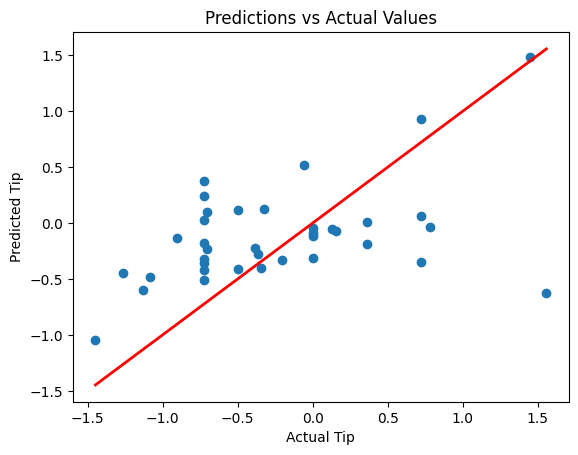

In [ ]:
#Visualizing Predictions vs Actual Values
# Visualize predicted vs actual values
plt.scatter(y_test, y_pred_final)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.show()


In [ ]:
#Model Interpretation
# Coefficients from Ridge regression
print(f'Coefficients: {best_model.coef_}')


Coefficients: [ 0.37569843  0.20498675  0.02975259 -0.03928673  0.00433175  0.00071895
 -0.0044313  -0.007692  ]
